# GTSDB

Investigating the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this project is to go through the steps described below and to implement the necessary code.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

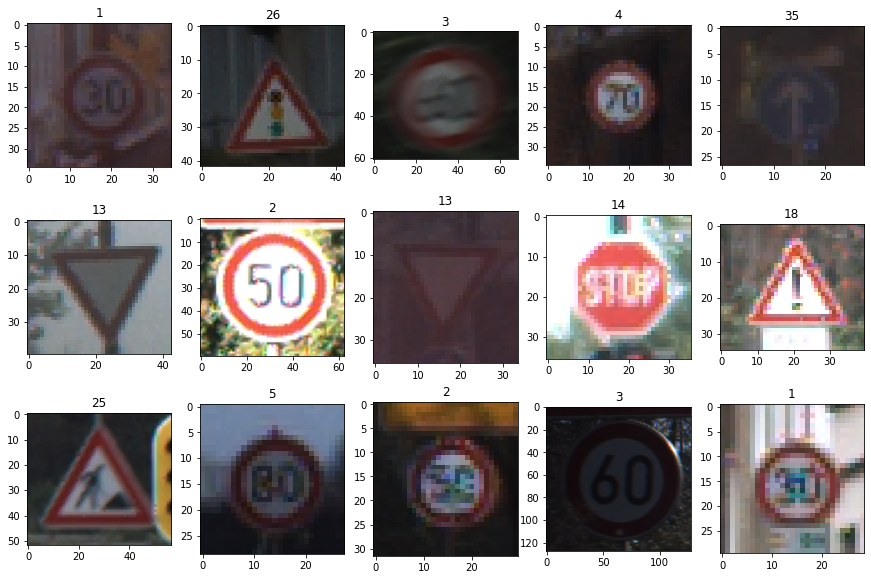

In [2]:
# Load the training labels
root = 'data/archive' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 1

Inspect the dataset by computing and plotting the per-class histogram.

In [3]:
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


Compute the per class histogram. 

Text(0.5, 0, 'Traffic Sign ID')

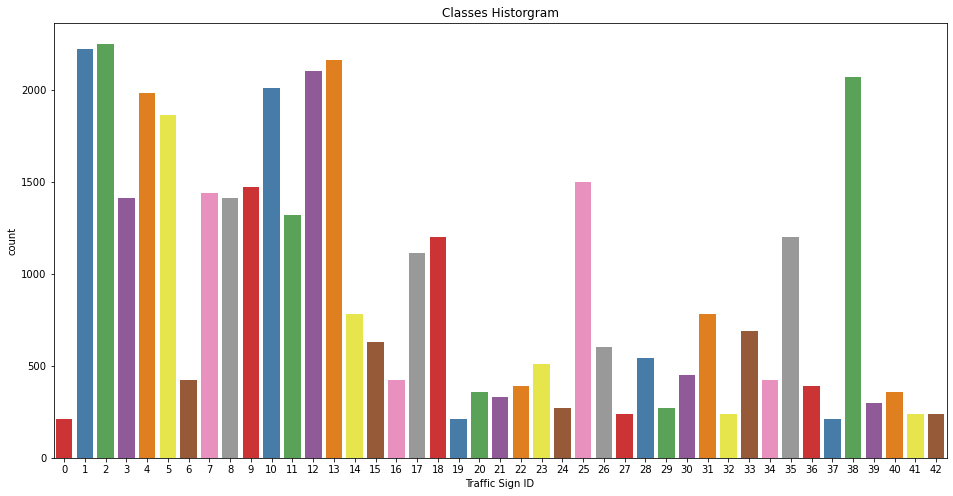

In [8]:
import seaborn as sns
plt.figure(figsize=(16,8))
ax = sns.countplot(x="ClassId", data=data,palette="Set1")
plt.title('Classes Historgram')
plt.xlabel('Traffic Sign ID')

Dataset is not balanced: some classes have about 200 hundred items, when other have more than 2000

In [9]:
class_counts = data.groupby('ClassId')['ClassId'].count().reset_index(name='Counts')
#Over-represented
class_counts[class_counts.Counts >2000] 

,ClassId,Counts
1,1,2220
2,2,2250
10,10,2010
12,12,2100
13,13,2160
38,38,2070


In [11]:
# Under-represneted
class_counts[class_counts.Counts <500] 

,ClassId,Counts
0,0,210
6,6,420
16,16,420
19,19,210
20,20,360
21,21,330
22,22,390
24,24,270
27,27,240
29,29,270


Perform a further analysis on the dataset

### Resolution distribution

In [6]:
resolution = (data['Width']*data['Height']).reset_index(name='Resolution')
data = pd.concat([data,resolution], axis = 1)
data.drop(columns='index')

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Resolution
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,702
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,756
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,754
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,756
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,728
...,...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png,2912
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png,3248
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png,3596
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png,4347


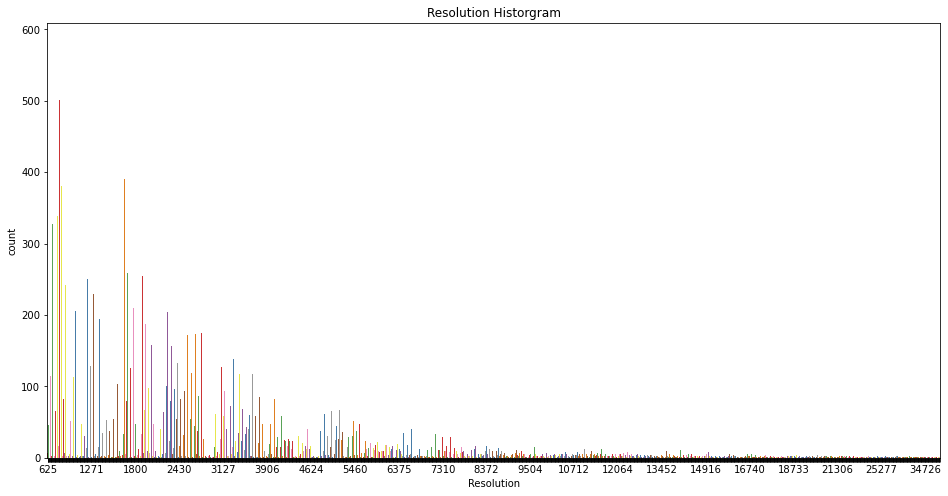

In [12]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x="Resolution", data=data,palette="Set1")
plt.title('Resolution Historgram')
plt.xlabel('Resolution')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 100 == 0:  # every 100th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [13]:
class_counts = data.groupby('Resolution')['Resolution'].count().reset_index(name='Count')
class_counts.sort_values('Count', ascending = False).head(20)

,Resolution,Count
72,1122,580
37,930,580
60,1056,548
86,1190,509
47,992,504
27,870,501
112,1332,472
99,1260,469
143,1482,433
127,1406,428


> Most common resolution is 300-600px, but there are some images with resolution 0.3MPx

### Brightness distribution

In [14]:
#data = data.assign(Brightness =)
brightness_lvl = pd.DataFrame( np.zeros(num_samples),columns = ['Brightness'])
for i in range(num_samples):
    # load image
    img = cv2.imread(os.path.join(root, data.iloc[i]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #get brightness
    br = img.mean().astype(int)
    brightness_lvl['Brightness'][i]= br



In [15]:
data = pd.concat([data,brightness_lvl], axis = 1)
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,index,Resolution,Brightness
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,0,702,58.0
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,1,756,58.0
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,2,754,58.0
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,3,756,58.0
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,4,728,56.0
...,...,...,...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png,39204,2912,27.0
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png,39205,3248,27.0
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png,39206,3596,27.0
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png,39207,4347,27.0


In [ ]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x="Brightness", data=data)
plt.title('Brightness Historgram')
plt.xlabel('Brightness')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

>Majority of images are quiet dark, very few images are overshooted.